# Vector를 이용한 Linear Regression ?

응용을 조금 많이 한 부분인데, 어려울 수 있으므로 요주의

먼저 x_data와 numpy의 랜덤 숫자 생성 함수를 이용해 무작위로 생성,,
그런 다음 y_data를 내가 원하는 공식인 x * 0.1 + 0.3 + (0.0을 중간으로 하여금 무작위로 생성한 숫자)

그리고 이를 Linear Regression으로 하여 그래프로 GO!


In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

step [W] [b] [loss]
0 [ 0.68060595] [ 0.31021678] 0.100581


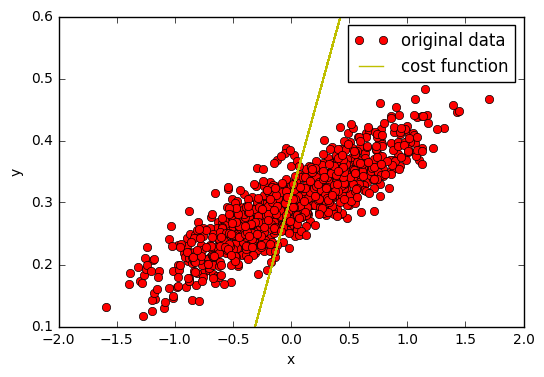

500 [ 0.1004858] [ 0.2981483] 0.000922648


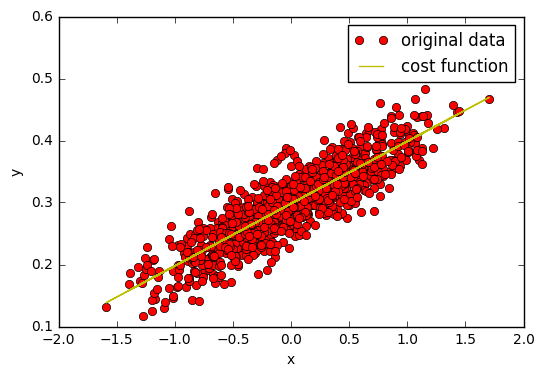

In [48]:
# -*- coding: utf-8 -*-

'''
먼저 기본 구성에 들어가보자.
'''

vectors_set = []

# 원본 데이터를 어떠한 무작위 값으로 내림,, 
for i in range(1000):
    x1 = np.random.normal(0, 0.55) # (mean, sigma), random number generator,,
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
# 생성한 vectors_set에서 1번째 열은 x_data에,,
# 2번째 열은 y_data에 각각 넣어줌,,
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

W = tf.Variable(tf.random_uniform([1], -1.0,1.0))
b = tf.Variable(tf.zeros([1]))
h = W * x_data + b
loss = tf.reduce_mean(tf.square(h - y_data))

alpha = 0.5

optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

print ("step [W] [b] [loss]")

for step in range(1000):
    sess.run(train)
    
    if step % 20 == 0:
        print (step, sess.run(W), sess.run(b), sess.run(loss))
        plt.plot(x_data, y_data, 'ro', label='original data')
        plt.plot(x_data, sess.run(W)*x_data+sess.run(b), 'y-', label='cost function')
        plt.xlabel('x')
        plt.xlim(-2,2)
        plt.ylabel('y')
        plt.ylim(0.1, 0.6)
        plt.legend()
        plt.show()

우오오!! 숫자보다 100배는 편함..... +_+ <br />
하지만 일일이 뭐가 이루어지는지는 볼 수가 없구나.... ㅠㅠ

step [W] [b] cost
0 [ 0.75452614] [ 0.97461522] 0.274106


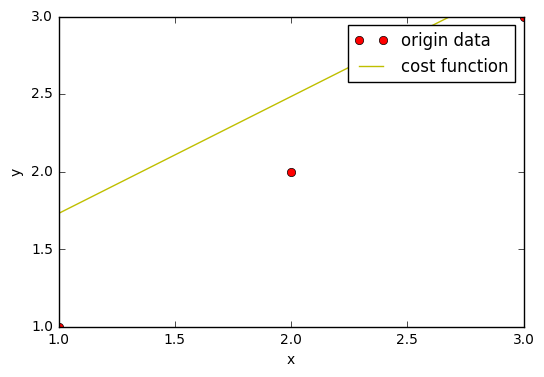

200 [ 0.99692768] [ 0.006984] 6.9976e-06


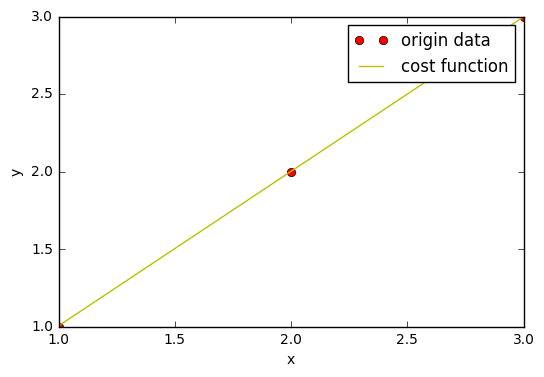

400 [ 0.99997634] [  5.37701017e-05] 4.15246e-10


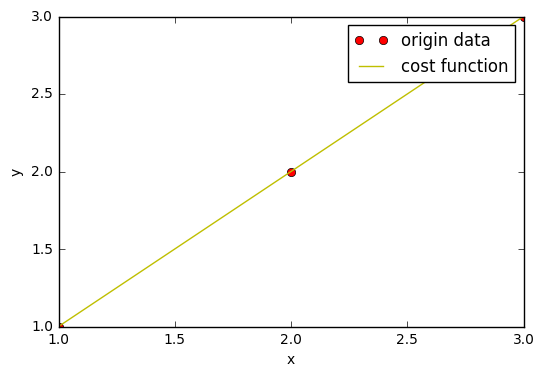

600 [ 0.9999997] [  6.02759371e-07] 6.15804e-14


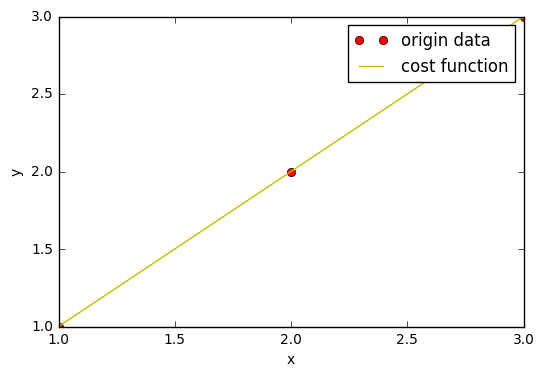

800 [ 1.] [  5.43964589e-08] 0.0


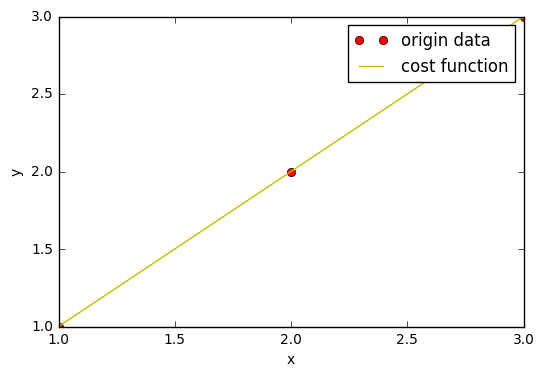

In [47]:
# -*- coding: utf-8 -*-

'''
이번엔 조금 쉽게 가보자...
'''

x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_uniform([1], -1,1))
b = tf.Variable(tf.random_uniform([1], -1,1))

h = W * x_data + b

loss = tf.reduce_mean(tf.square(h - y_data))

alpha = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(loss)

# 프로그램 실행 준비
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

print ("step [W] [b] cost")

for step in range(1000):
    sess.run(train)
    if step % 200 == 0:
        print(step, sess.run(W), sess.run(b), sess.run(loss))
        plt.plot(x_data, y_data, 'ro', label='origin data')
        plt.plot(x_data, sess.run(h), 'y-', label='cost function')
        plt.xlabel('x')
        plt.xlim(1,3)
        plt.ylabel('y')
        plt.ylim(1,3)
        plt.legend()
        plt.show()

뭔가 심플하지만 음 분석하는 의미가 없군 <br />
이거는 그냥 숫자로 하는게 나을지도 ㅋㅋㅋ;